In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
import joblib

import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
import math

In [2]:
all_data = pd.read_csv("RV2_UPP_IIR_SIPIA.csv")
print(all_data.head())

                        Date  Latitude  Longitude  Altitude   NO2  PM2.5  O3  \
0  2023-02-22 09:15:00+00:00   46.5592  15.656191     270.0  35.0   23.0   0   
1  2023-02-22 09:35:00+00:00   46.5592  15.656191     270.0  35.0   23.0   0   
2  2023-02-16 17:15:00+00:00   46.5592  15.656191     270.0  86.0   51.0   0   
3  2023-02-16 17:35:00+00:00   46.5592  15.656191     270.0  86.0   51.0   0   
4  2023-10-24 10:35:00+00:00   46.5592  15.656191     270.0  68.0   19.0   0   

   PM10  
0  88.0  
1  88.0  
2  86.0  
3  86.0  
4  74.0  


In [3]:
all_data['Date'] = pd.to_datetime(all_data['Date'])
all_data.sort_values(by='Date', inplace=True)
features = ['Latitude', 'Longitude', 'Altitude', 'NO2', 'PM2.5', 'O3', 'PM10']
all_data = all_data[['Date'] + features]

In [4]:
missing_values = all_data.isnull().sum()

print(missing_values)

Date           0
Latitude       0
Longitude      0
Altitude       0
NO2          286
PM2.5        465
O3             0
PM10         466
dtype: int64


In [5]:
# Assuming 'all_data' is your DataFrame
measurements_by_day = all_data.groupby(all_data['Date'].dt.date).size()

# Print the result
print(measurements_by_day)


Date
2023-02-15     9
2023-02-16    48
2023-02-17    48
2023-02-18    48
2023-02-19    48
              ..
2023-12-07    24
2023-12-08    24
2023-12-09    24
2023-12-10    24
2023-12-11     9
Length: 211, dtype: int64


In [6]:
all_data = all_data.copy()
columns_with_missing_values = all_data.columns[all_data.isnull().any()]
print(columns_with_missing_values)
columns_with_missing_values = columns_with_missing_values.tolist()
missing_df = all_data[all_data.isnull().any(axis=1)]
complete_df = all_data.dropna()


Index(['NO2', 'PM2.5', 'PM10'], dtype='object')


In [7]:
def plot_histograms(df):
    numeric_columns = df.select_dtypes(include=['number'])
    numeric_columns.hist(bins=20, figsize=(20, 20))
    plt.title("Histograms of numerical columns")
    plt.show()

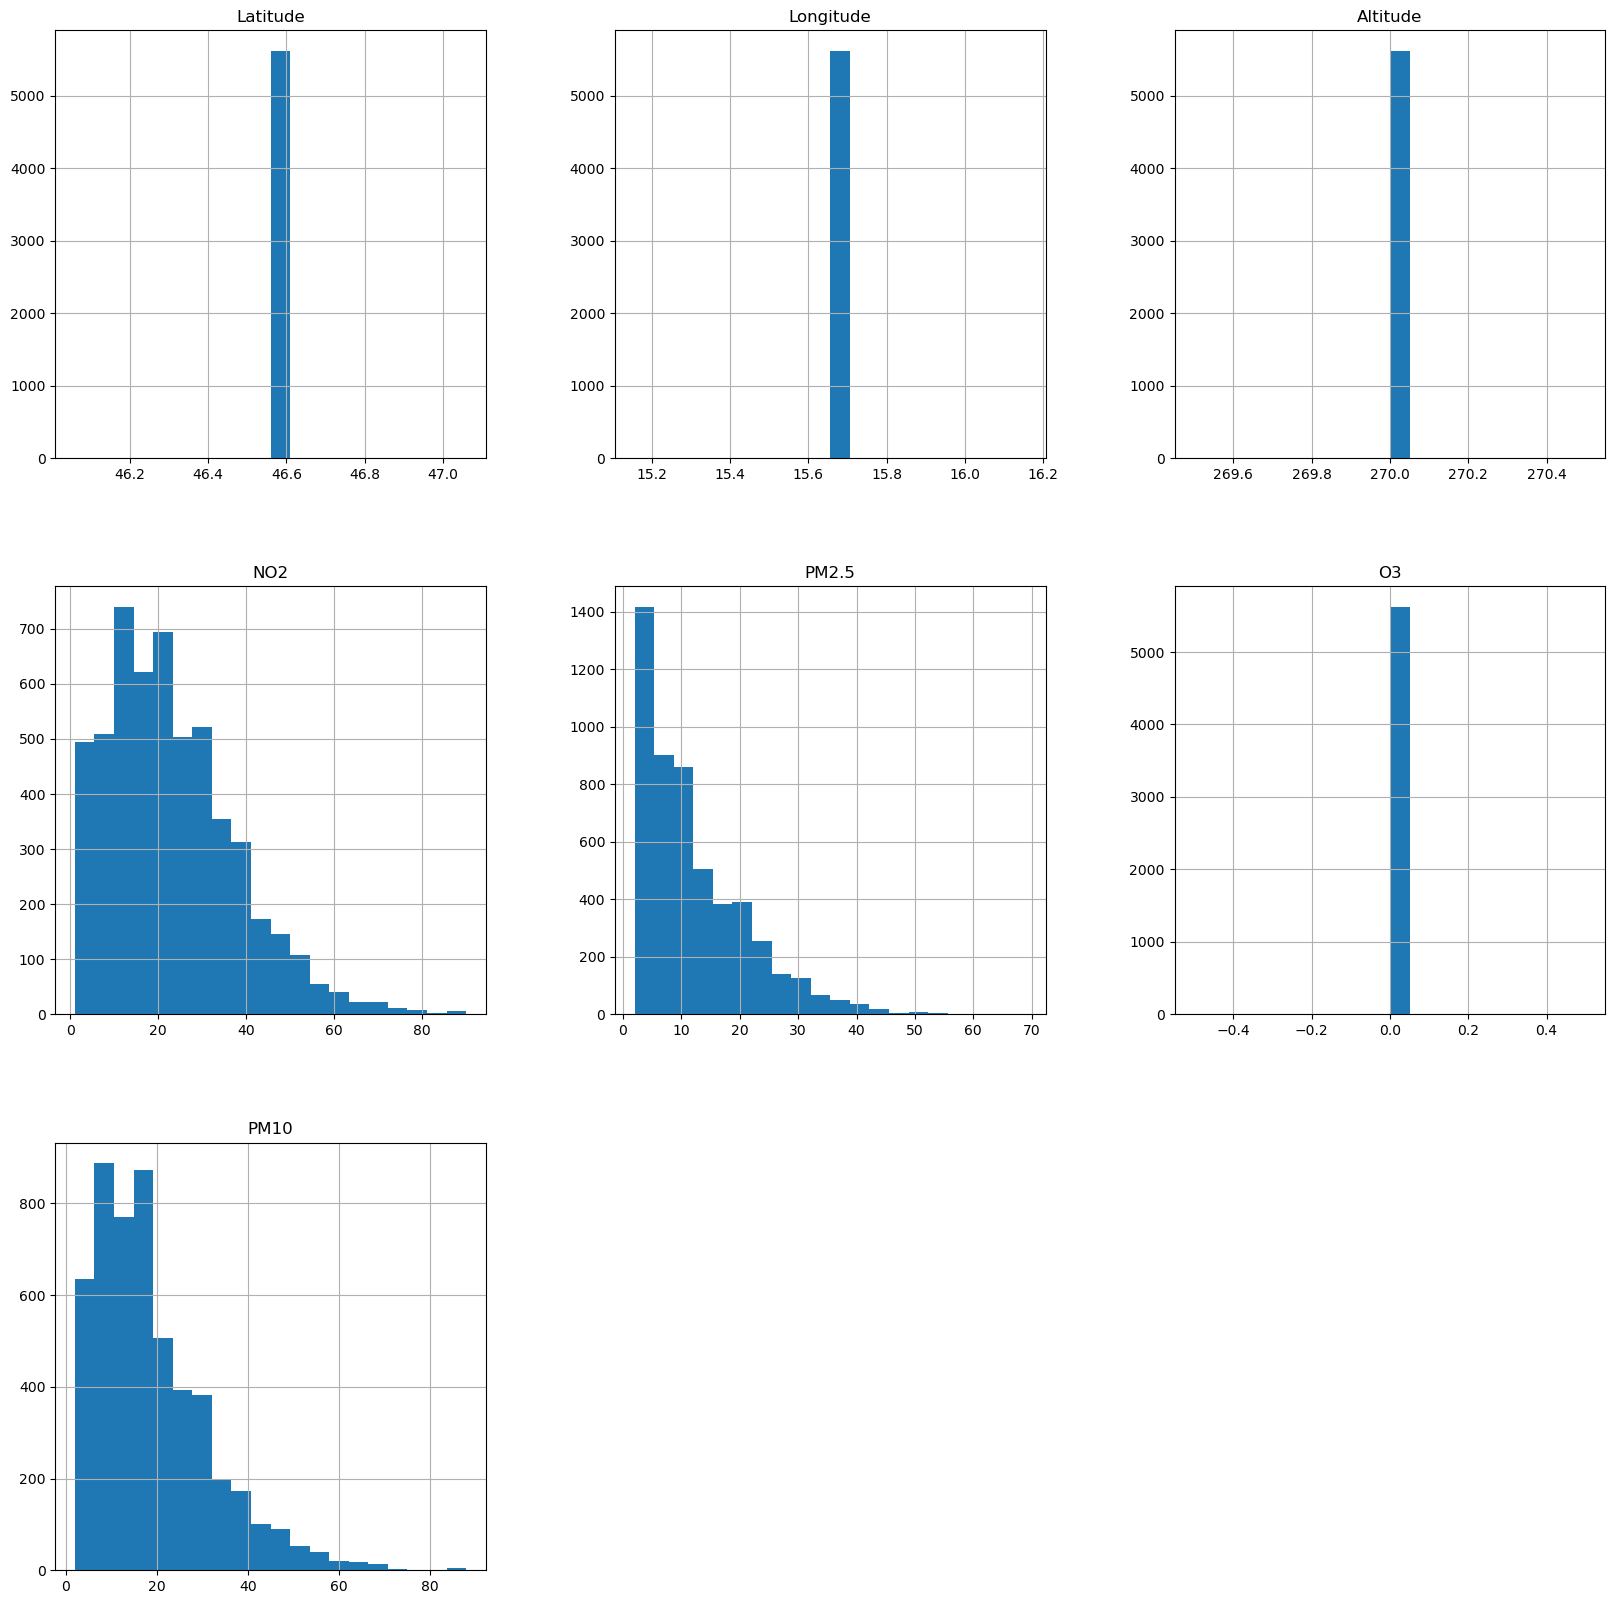

In [8]:
plot_histograms(all_data)

In [9]:
for column in columns_with_missing_values:
    X = complete_df[['Latitude', 'Longitude', 'Altitude', 'O3']]
    y = complete_df[column]
    
    model = RandomForestRegressor()
    model.fit(X, y)
    
    missing_X = missing_df[['Latitude', 'Longitude', 'Altitude', 'O3']]
    predictions = model.predict(missing_X)
    
    all_data.loc[missing_df.index, column] = predictions

missing_values = all_data.isnull().sum()

print(missing_values)

multivariate_series = np.array(all_data[features].values)

Date         0
Latitude     0
Longitude    0
Altitude     0
NO2          0
PM2.5        0
O3           0
PM10         0
dtype: int64


In [10]:
def plot_numeric_data(data):
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

    fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 5 * len(numerical_columns)))

    for i, column in enumerate(numerical_columns):
        sns.histplot(data[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)

    plt.tight_layout()
    plt.show()

In [11]:
print(all_data["Latitude"].describe())
print(all_data["Latitude"].value_counts())
print(all_data["Longitude"].value_counts())
print(all_data["O3"].value_counts())
print(all_data["O3"])

count    5.625000e+03
mean     4.655920e+01
std      4.384438e-12
min      4.655920e+01
25%      4.655920e+01
50%      4.655920e+01
75%      4.655920e+01
max      4.655920e+01
Name: Latitude, dtype: float64
Latitude
46.5592    5625
Name: count, dtype: int64
Longitude
15.656191    5625
Name: count, dtype: int64
O3
0    5625
Name: count, dtype: int64
72      0
78      0
79      0
153     0
154     0
       ..
1880    0
2633    0
3067    0
3548    0
3844    0
Name: O3, Length: 5625, dtype: int64


In [12]:
def printSkew():
  skewness_info = []
  for column in all_data.columns[1:]:
      skew = all_data[column].skew()
      skewness_info.append((column, skew))

  # Pretvori seznam v DataFrame za lažje prikazovanje
  skewness_df = pd.DataFrame(skewness_info, columns=['Column Name', 'Skewness'])

  # Izpišite oznako stolpca in njegovo poševnost
  print(skewness_df)

printSkew()

  Column Name  Skewness
0    Latitude  0.000000
1   Longitude  0.000000
2    Altitude  0.000000
3         NO2  0.923264
4       PM2.5  1.450682
5          O3  0.000000
6        PM10  1.351624


In [13]:
# Right skeewed data ["NO2", "PM2.5"]

right_skew_columns = ["NO2", "PM2.5"]
for col in right_skew_columns:
    all_data[col] = np.log(all_data[col]+1 )

  Column Name  Skewness
0    Latitude  0.000000
1   Longitude  0.000000
2    Altitude  0.000000
3         NO2 -0.761705
4       PM2.5 -0.159106
5          O3  0.000000
6        PM10  1.351624


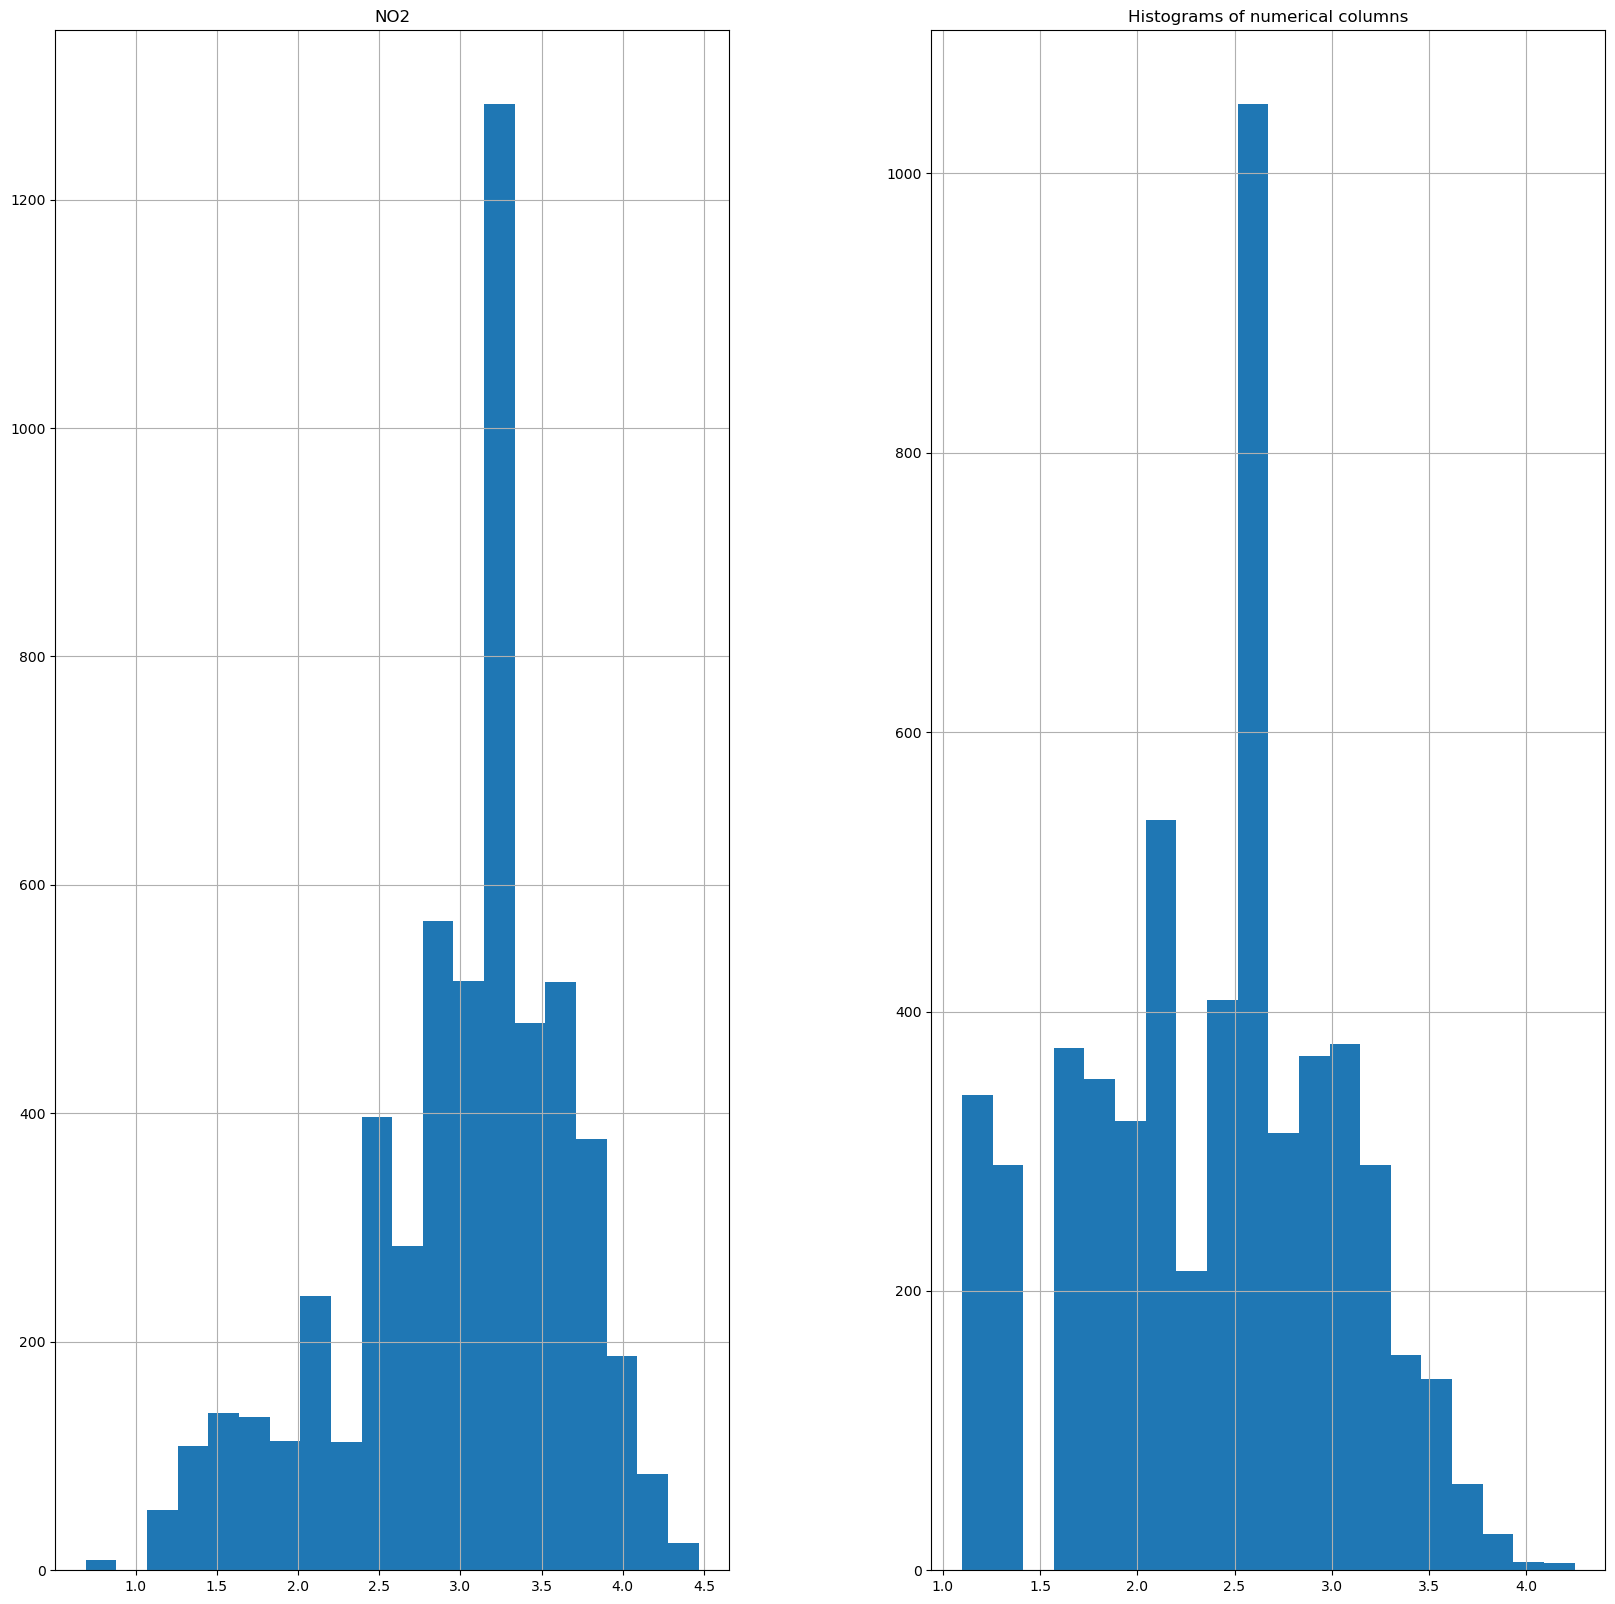

In [14]:
printSkew()
plot_histograms(all_data[['NO2', 'PM2.5']])

# Nove Značilnice

In [15]:
#engeeniring features
all_data['NO2_PM2.5_Interact'] = all_data['NO2'] * all_data['PM2.5']


In [16]:
all_data['Day'] = all_data['Date'].dt.day
all_data['Month'] = all_data['Date'].dt.month
all_data['Hour'] = all_data['Date'].dt.hour
all_data['Day_of_Week'] = all_data['Date'].dt.dayofweek



In [17]:
all_data["Day_of_Week"]

72      2
78      2
79      2
153     2
154     2
       ..
1880    0
2633    0
3067    0
3548    0
3844    0
Name: Day_of_Week, Length: 5625, dtype: int32

In [18]:
all_data['Hour_NO2_Interaction'] = all_data['Hour'] * all_data['NO2']
all_data['Hour_PM2.5_Interaction'] = all_data['Hour'] * all_data['PM2.5']

In [19]:
all_data.head()

,Date,Latitude,Longitude,Altitude,NO2,PM2.5,O3,PM10,NO2_PM2.5_Interact,Day,Month,Hour,Day_of_Week,Hour_NO2_Interaction,Hour_PM2.5_Interaction
72,2023-02-15 19:35:00+00:00,46.5592,15.656191,270.0,3.871201,3.871201,0,56.0,14.986197,15,2,19,2,73.552819,73.552819
78,2023-02-15 20:15:00+00:00,46.5592,15.656191,270.0,3.713572,3.912023,0,56.0,14.527579,15,2,20,2,74.271441,78.240460
79,2023-02-15 20:35:00+00:00,46.5592,15.656191,270.0,3.713572,3.912023,0,56.0,14.527579,15,2,20,2,74.271441,78.240460
153,2023-02-15 21:15:00+00:00,46.5592,15.656191,270.0,3.465736,3.806662,0,49.0,13.192887,15,2,21,2,72.780454,79.939912
154,2023-02-15 21:35:00+00:00,46.5592,15.656191,270.0,3.465736,3.806662,0,49.0,13.192887,15,2,21,2,72.780454,79.939912


# Information Gain

In [20]:
target = all_data['PM10']
target_feature = all_data.drop('Date', axis=1)

info_gains = mutual_info_regression(target_feature.drop('PM10', axis=1), target)

info_gain_df = pd.DataFrame({'Feature': target_feature.columns.drop('PM10'), 'Information_Gain': info_gains})
info_gain_df = info_gain_df.sort_values(by='Information_Gain', ascending=False)

print(info_gain_df)

threshold = 0.1
selected_features = info_gain_df[info_gain_df['Information_Gain'] >= threshold]['Feature']

print("Selected Features:")
print(selected_features)

                   Feature  Information_Gain
4                    PM2.5          1.385853
6       NO2_PM2.5_Interact          1.234385
12  Hour_PM2.5_Interaction          0.779492
3                      NO2          0.573318
11    Hour_NO2_Interaction          0.408788
7                      Day          0.189977
8                    Month          0.173488
9                     Hour          0.059680
10             Day_of_Week          0.038479
1                Longitude          0.001689
0                 Latitude          0.000800
2                 Altitude          0.000000
5                       O3          0.000000
Selected Features:
4                      PM2.5
6         NO2_PM2.5_Interact
12    Hour_PM2.5_Interaction
3                        NO2
11      Hour_NO2_Interaction
7                        Day
8                      Month
Name: Feature, dtype: object


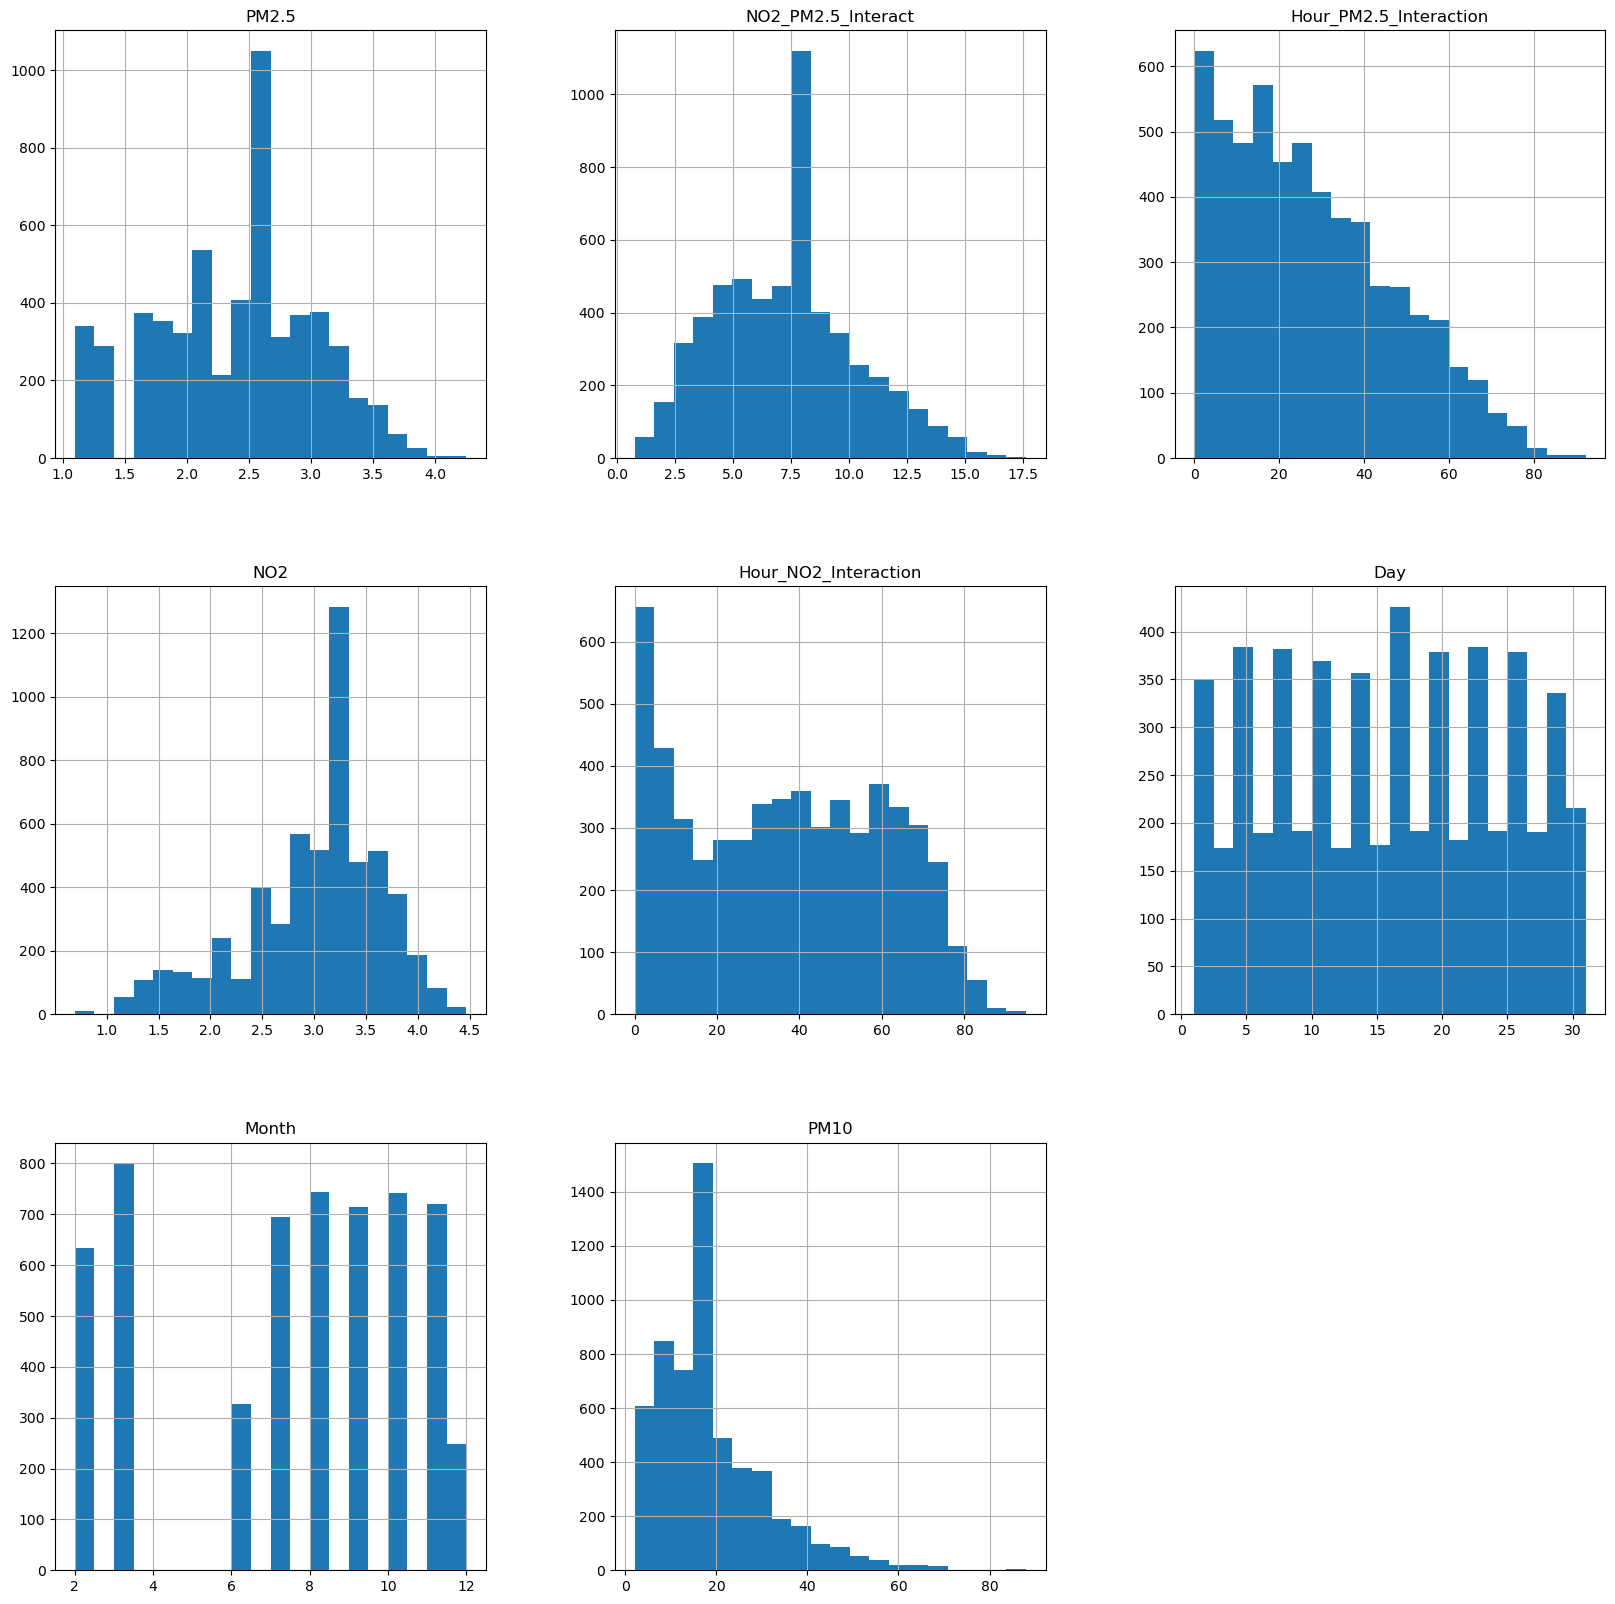

In [21]:
learn_features = all_data[['Date'] + list(selected_features) + ['PM10']]
plot_histograms(learn_features)


In [22]:
# spliting data into test and train
train_size = len(multivariate_series) - 1302 - 186
train_data, test_data = multivariate_series[:train_size], multivariate_series[train_size:]

In [23]:
train_data.shape, test_data.shape

((4137, 7), (1488, 7))

In [24]:
train_pm10 = np.array(train_data[:,6])
test_pm10 = np.array(test_data[:,6])
pm10_scaler = MinMaxScaler()
train_pm10_normalized = pm10_scaler.fit_transform(train_pm10.reshape(-1, 1))
test_pm10_normalized = pm10_scaler.transform(test_pm10.reshape(-1, 1))

print(train_pm10_normalized)
print(test_pm10_normalized)


[[0.62790698]
 [0.62790698]
 [0.62790698]
 ...
 [0.19793632]
 [0.19793632]
 [0.19793632]]
[[0.19793632]
 [0.19793632]
 [0.19793632]
 ...
 [0.12790698]
 [0.10465116]
 [0.09302326]]


In [25]:
train_other = np.array(train_data[:,:6])
test_other = np.array(test_data[:,:6])
other_scaler = MinMaxScaler()
train_other_normalized = other_scaler.fit_transform(train_other)
test_other_normalized = other_scaler.transform(test_other)

print(train_other_normalized)
print(test_other_normalized)

[[0.         0.         0.         0.54117647 0.91836735 0.        ]
 [0.         0.         0.         0.45882353 0.95918367 0.        ]
 [0.         0.         0.         0.45882353 0.95918367 0.        ]
 ...
 [0.         0.         0.         0.26140021 0.20750978 0.        ]
 [0.         0.         0.         0.26140021 0.20750978 0.        ]
 [0.         0.         0.         0.26140021 0.20750978 0.        ]]
[[0.         0.         0.         0.26140021 0.20750978 0.        ]
 [0.         0.         0.         0.26140021 0.20750978 0.        ]
 [0.         0.         0.         0.26140021 0.20750978 0.        ]
 ...
 [0.         0.         0.         0.31764706 0.20408163 0.        ]
 [0.         0.         0.         0.37647059 0.14285714 0.        ]
 [0.         0.         0.         0.44705882 0.12244898 0.        ]]


In [26]:
train_normalized = np.column_stack([train_pm10_normalized, train_other_normalized])
test_normalized = np.column_stack([test_pm10_normalized, test_other_normalized])

# Now train_normalized and test_normalized have the same shape as before
print("Shape of train_normalized:", train_normalized.shape)
print("Shape of test_normalized:", test_normalized.shape)

Shape of train_normalized: (4137, 7)
Shape of test_normalized: (1488, 7)


In [27]:
def create_multivariate_dataset_with_steps(time_series, look_back=1, step=1):
    X, y = [], []
    for i in range(0, len(time_series) - look_back, step):
        X.append(time_series[i:(i + look_back), :])
        y.append(time_series[i + look_back, 0]) 
    return np.array(X), np.array(y)

look_back = 186
step = 1

X_train, y_train = create_multivariate_dataset_with_steps(train_normalized, look_back, step)
X_test, y_test = create_multivariate_dataset_with_steps(test_normalized, look_back, step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[1])


print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test}")

X_train shape: (3951, 7, 186)
y_train shape: [0.25581395 0.38372093 0.38372093 ... 0.19793632 0.19793632 0.19793632]
X_test shape: (1302, 7, 186)
y_test shape: [0.19767442 0.18604651 0.1627907  ... 0.12790698 0.10465116 0.09302326]


In [28]:
from tensorflow.keras.layers import LSTM, GRU, Dense, RNN, SimpleRNNCell

def build_rnn_model(input_shape):
    model = Sequential()
    model.add(RNN(SimpleRNNCell(32), return_sequences=True, input_shape=input_shape))
    model.add(RNN(SimpleRNNCell(32)))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1))
    return model

def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=32, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=32))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1))
    return model

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=32, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=32))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1))
    return model

In [29]:
def train_and_plot_model(model, X_train, y_train, epochs=50):
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2, verbose=1)
    
    # Izris zgodovine učenja
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Learning History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [30]:
input_shape = (X_train.shape[1], X_train.shape[2])

Epoch 1/30
99/99 [==============================] - 3s 11ms/step - loss: 0.0199 - val_loss: 0.0049
Epoch 2/30
99/99 [==============================] - 1s 6ms/step - loss: 0.0058 - val_loss: 0.0045
Epoch 3/30
99/99 [==============================] - 1s 6ms/step - loss: 0.0048 - val_loss: 0.0033
Epoch 4/30
99/99 [==============================] - 1s 6ms/step - loss: 0.0043 - val_loss: 0.0031
Epoch 5/30
99/99 [==============================] - 1s 6ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 6/30
99/99 [==============================] - 1s 6ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 7/30
99/99 [==============================] - 1s 6ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 8/30
99/99 [==============================] - 1s 6ms/step - loss: 0.0034 - val_loss: 0.0028
Epoch 9/30
99/99 [==============================] - 1s 5ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 10/30
99/99 [==============================] - 1s 6ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 11/30
99/99 

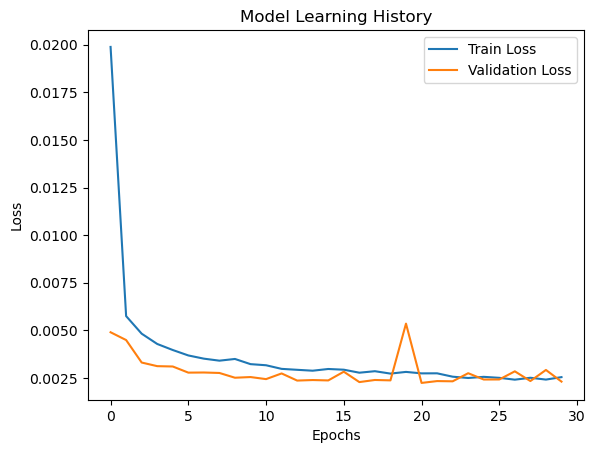

In [31]:
rnn_model_adv = build_rnn_model(input_shape)
train_and_plot_model(rnn_model_adv, X_train, y_train, epochs=30)

Epoch 1/30
99/99 [==============================] - 6s 19ms/step - loss: 0.0114 - val_loss: 0.0041
Epoch 2/30
99/99 [==============================] - 1s 11ms/step - loss: 0.0049 - val_loss: 0.0032
Epoch 3/30
99/99 [==============================] - 1s 11ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 4/30
99/99 [==============================] - 1s 11ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 5/30
99/99 [==============================] - 1s 11ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 6/30
99/99 [==============================] - 1s 11ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 7/30
99/99 [==============================] - 1s 11ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 8/30
99/99 [==============================] - 1s 11ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 9/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 10/30
99/99 [==============================] - 1s 11ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 11/

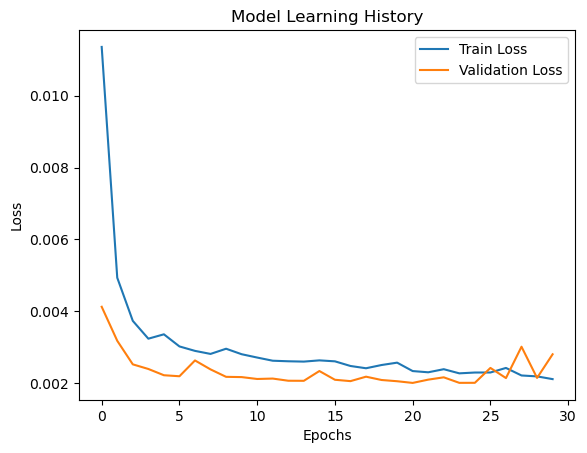

In [32]:
gru_model_adv = build_gru_model(input_shape)
train_and_plot_model(gru_model_adv, X_train, y_train, epochs=30)

Epoch 1/30
99/99 [==============================] - 6s 19ms/step - loss: 0.0121 - val_loss: 0.0062
Epoch 2/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0071 - val_loss: 0.0042
Epoch 3/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0052 - val_loss: 0.0034
Epoch 4/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0042 - val_loss: 0.0029
Epoch 5/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 6/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 7/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 8/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 9/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 10/30
99/99 [==============================] - 1s 10ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 11/

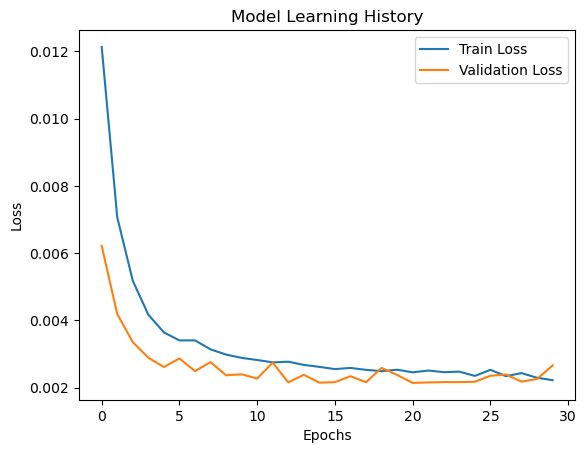

In [33]:
lstm_model_adv = build_lstm_model(input_shape)
train_and_plot_model(lstm_model_adv, X_train, y_train, epochs=30)

In [34]:
y_test_pred_rnn_adv = rnn_model_adv.predict(X_test)
y_test_pred_gru_adv = gru_model_adv.predict(X_test)
y_test_pred_lstm_adv = lstm_model_adv.predict(X_test)


41/41 [==============================] - 2s 5ms/step


In [35]:
print(y_test.shape)
y_test_true = pm10_scaler.inverse_transform(y_test.reshape(-1, 1))

print(y_test_true.shape)


y_test_pred_rnn_adv = pm10_scaler.inverse_transform(y_test_pred_rnn_adv)
y_test_pred_gru_adv = pm10_scaler.inverse_transform(y_test_pred_gru_adv)
y_test_pred_lstm_adv = pm10_scaler.inverse_transform(y_test_pred_lstm_adv)

(1302,)
(1302, 1)


In [36]:
def calculate_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    return mae, mse, evs

In [37]:
rnn_mae_adv, rnn_mse_adv, rnn_evs_adv = calculate_metrics(y_test_true, y_test_pred_rnn_adv)
gru_mae_adv, gru_mse_adv, gru_evs_adv = calculate_metrics(y_test_true, y_test_pred_gru_adv)
lstm_mae_adv, lstm_mse_adv, lstm_evs_adv = calculate_metrics(y_test_true, y_test_pred_lstm_adv)

print("RNN Model Metrics:")
print(f"MAE: {rnn_mae_adv}, MSE: {rnn_mse_adv}, EVS: {rnn_evs_adv}")

print("\nGRU Model Metrics:")
print(f"MAE: {gru_mae_adv}, MSE: {gru_mse_adv}, EVS: {gru_evs_adv}")

print("\nLSTM Model Metrics:")
print(f"MAE: {lstm_mae_adv}, MSE: {lstm_mse_adv}, EVS: {lstm_evs_adv}")

RNN Model Metrics:
MAE: 4.635829272758671, MSE: 44.01446923876602, EVS: 0.7140296909865422

GRU Model Metrics:
MAE: 4.270476997167618, MSE: 43.99800789990383, EVS: 0.7360999561604611

LSTM Model Metrics:
MAE: 4.34423172509388, MSE: 43.257802139127115, EVS: 0.7315025622708926


(1302,)


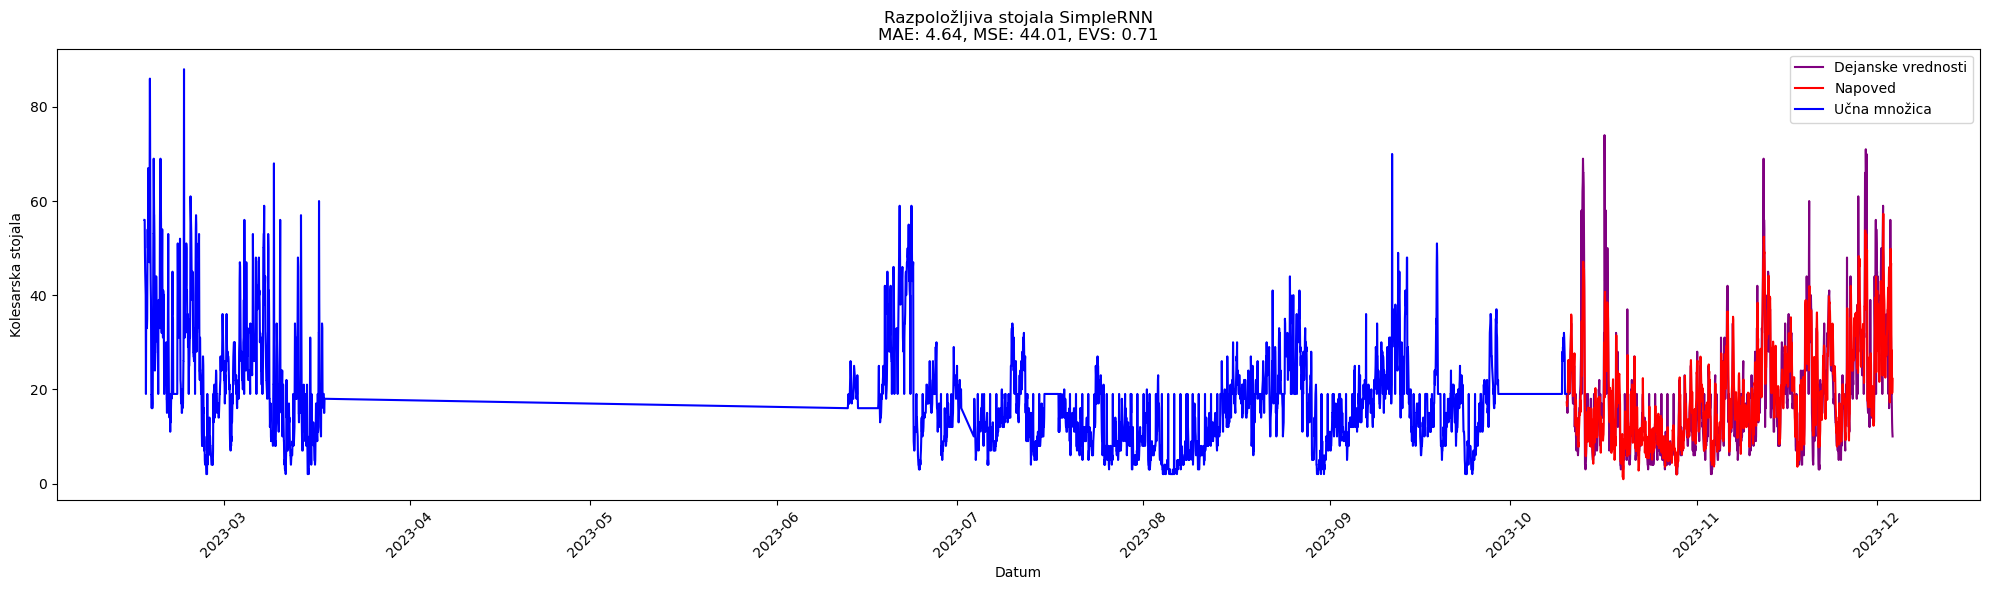

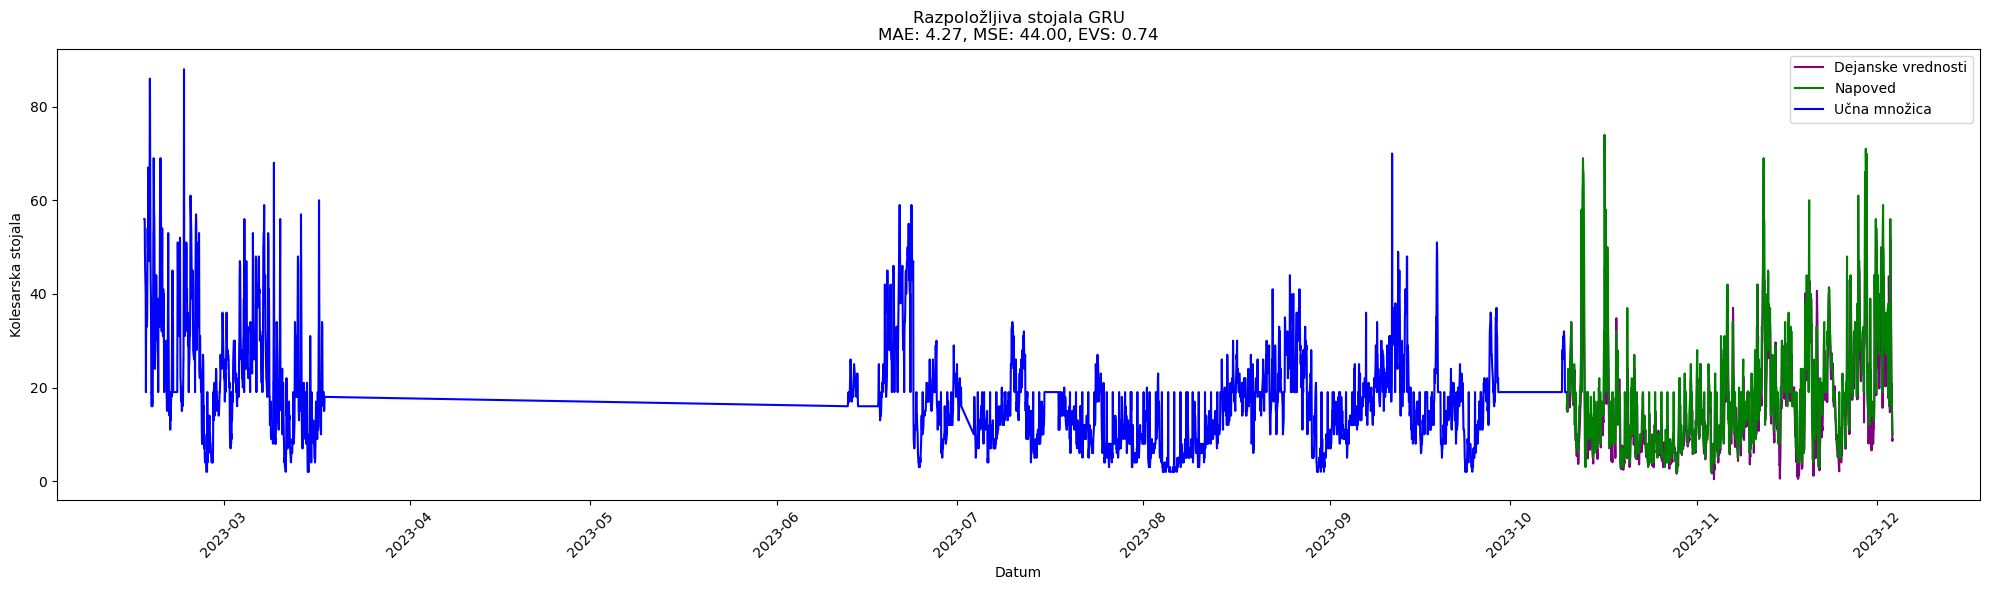

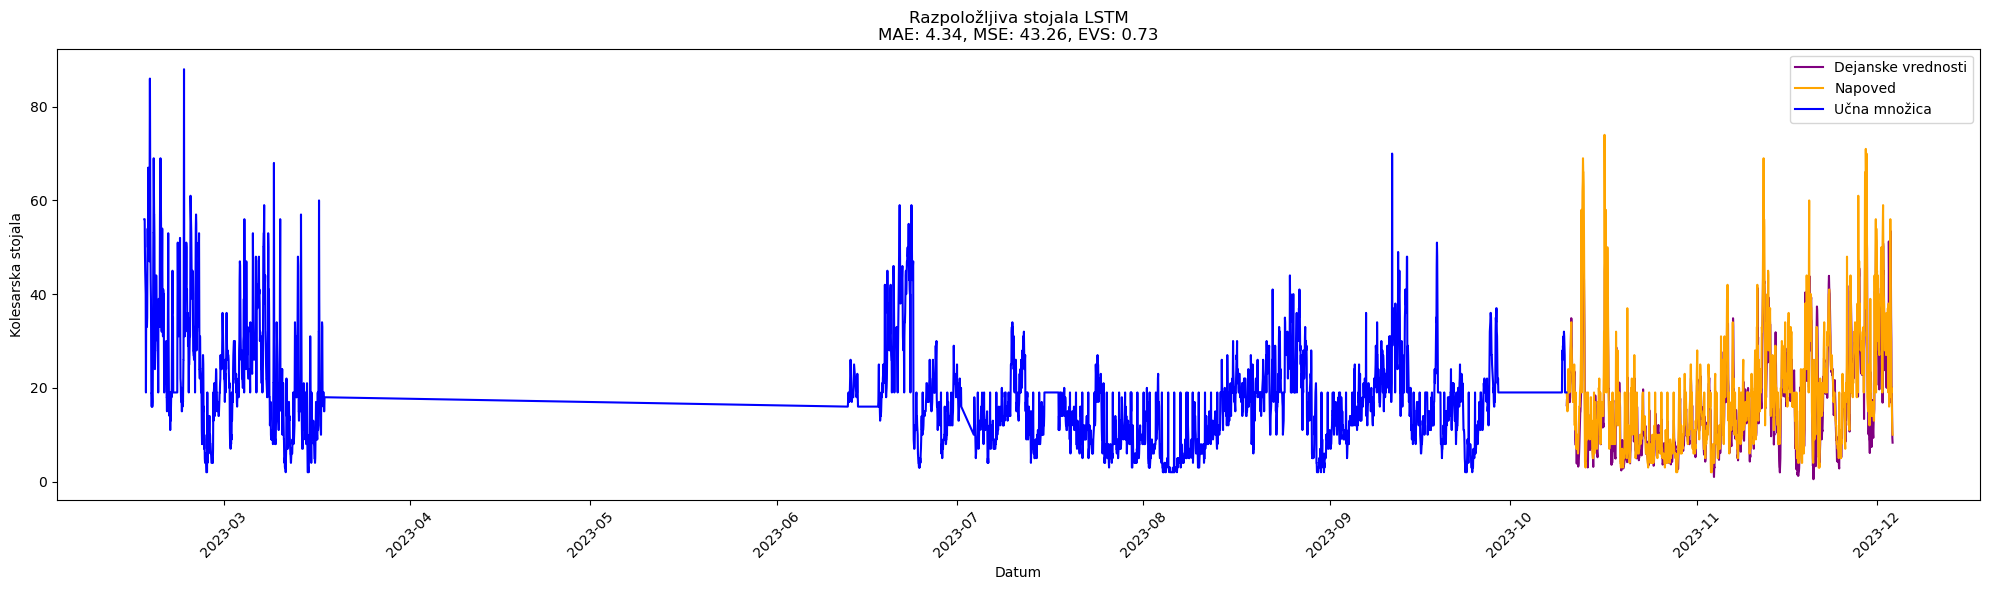

In [38]:
dates = all_data['Date'][:-look_back][-len(y_test):]
train_dates =  all_data['Date'][:len(train_data)]


print(dates.shape)
# Function to plot a comparison between actual values and predictions for a given model
def plot_comparison(train_dates, train_data, test_dates, y_pred_inverse, y_test_inverse, model_name, color1, color2, mae, mse, evs):
    plt.figure(figsize=(20, 6))
    plt.title(f'Razpoložljiva stojala {model_name}\nMAE: {mae:.2f}, MSE: {mse:.2f}, EVS: {evs:.2f}')
    plt.xlabel('Datum')
    plt.ylabel('Kolesarska stojala')
    plt.xticks(rotation=45)
    plt.plot(test_dates, y_test_inverse, color='purple', label='Dejanske vrednosti')
    plt.plot(test_dates, y_pred_inverse, color=color2, label=f'Napoved')
    plt.plot(train_dates, train_data, color=color1, label='Učna množica')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plotting RNN predictions
plot_comparison(
    train_dates,
    train_data[:,6],
    dates,
    y_test_pred_rnn_adv,
    y_test_true,

    'SimpleRNN',
    'blue',
    'red',
    rnn_mae_adv,
    rnn_mse_adv,
    rnn_evs_adv
)

# Plotting GRU predictions
plot_comparison(
    train_dates,
    train_data[:,6],
    dates,
    y_test_true,
    y_test_pred_gru_adv,
    'GRU',
    'blue',
    'green',
    gru_mae_adv,
    gru_mse_adv,
    gru_evs_adv
)

# Plotting LSTM predictions
plot_comparison(
    train_dates,
    train_data[:,6],
    dates,
    y_test_true,
    y_test_pred_lstm_adv,
    'LSTM',
    'blue',
    'orange',
    lstm_mae_adv,
    lstm_mse_adv,
    lstm_evs_adv
)

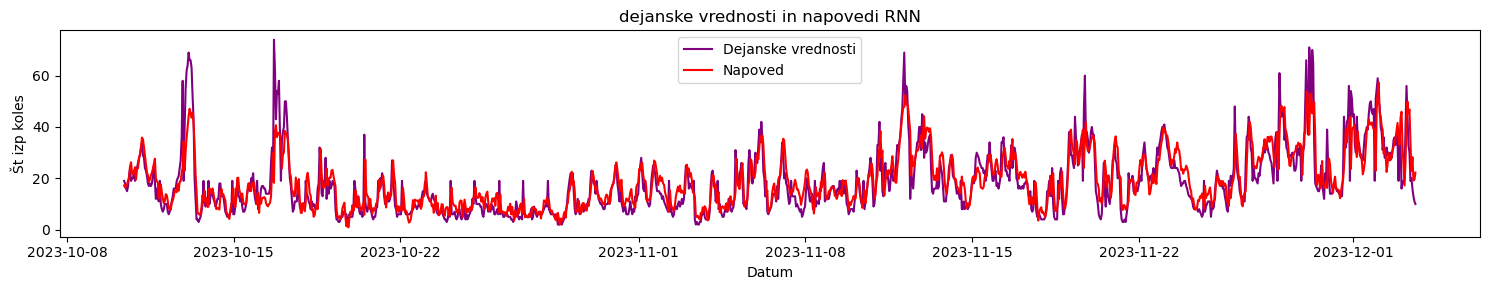

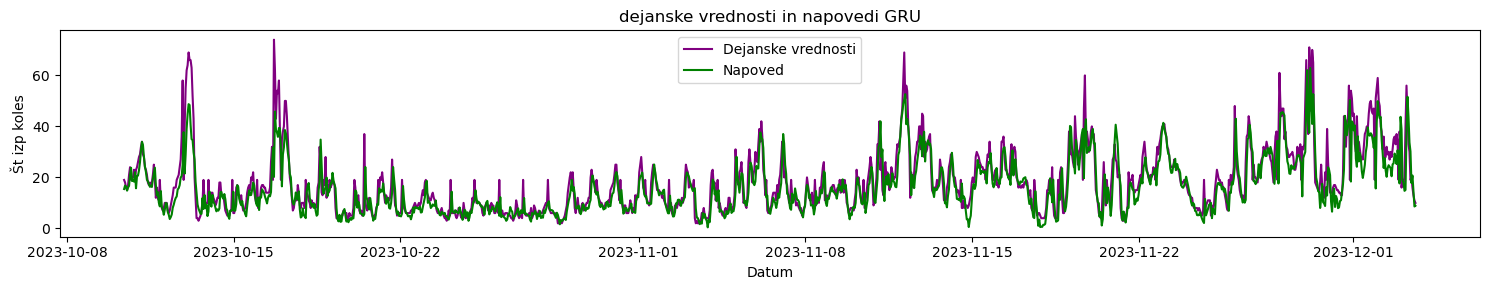

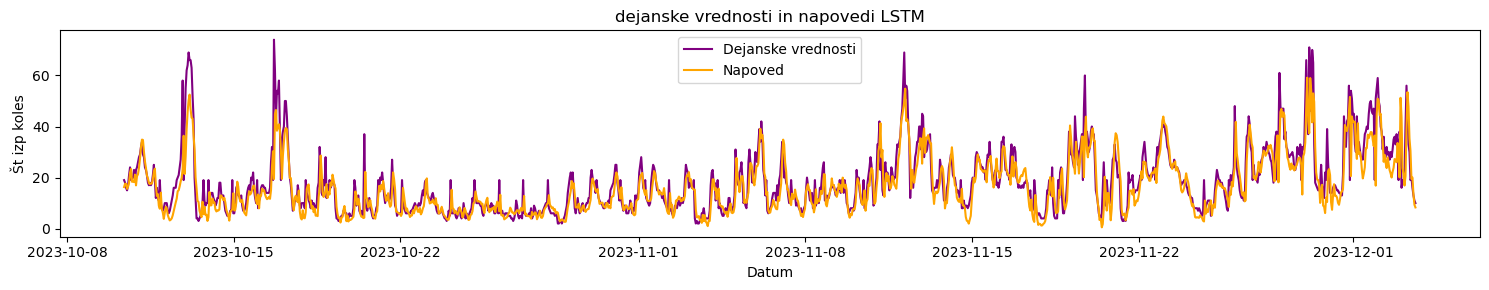

In [39]:
def plot_comparison(test_dates, y_test_inverse, y_pred_inverse, model_name, color):
    plt.figure(figsize=(15, 3))
    plt.plot(test_dates, y_test_inverse, color='purple', label='Dejanske vrednosti')
    plt.plot(test_dates, y_pred_inverse, color=color, label='Napoved')
    plt.title(f'dejanske vrednosti in napovedi {model_name}')
    plt.xlabel('Datum')
    plt.ylabel('Št izp koles')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_comparison(dates, y_test_true, y_test_pred_rnn_adv, 'RNN', 'red')

plot_comparison(dates, y_test_true, y_test_pred_gru_adv, 'GRU', 'green')

plot_comparison(dates, y_test_true, y_test_pred_lstm_adv, 'LSTM', 'orange')

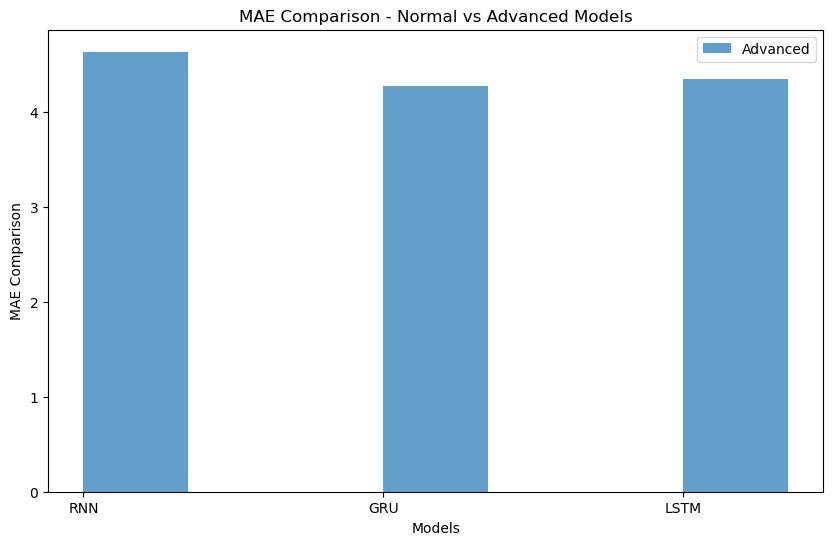

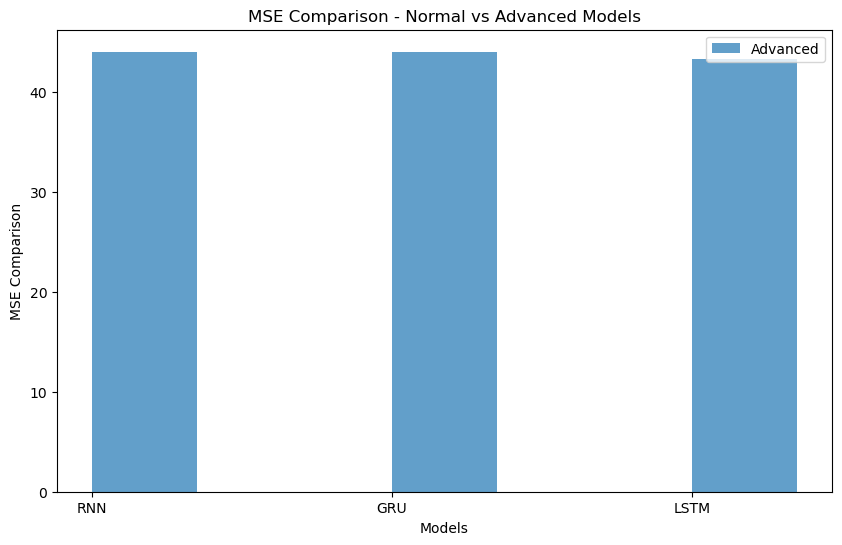

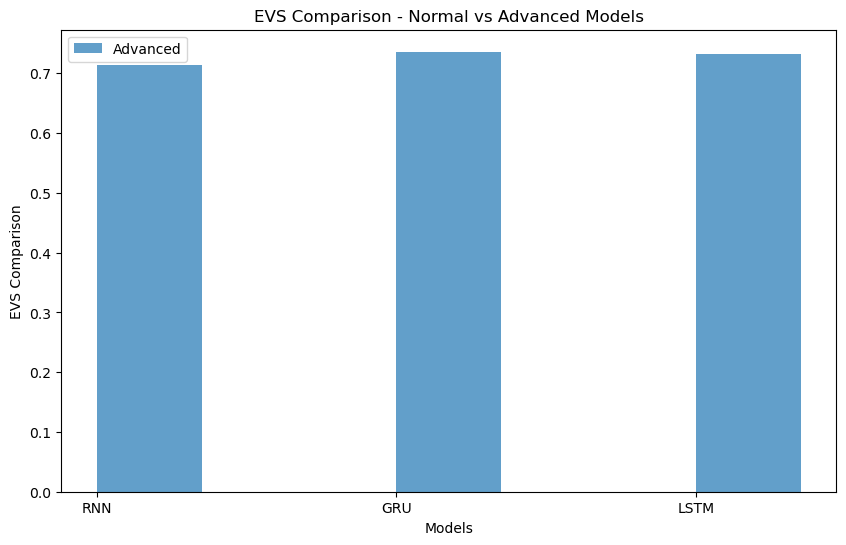

In [40]:

def plot_metric_comparison(adv_metrics, metric_name):
    models = ['RNN', 'GRU', 'LSTM']

    bar_width = 0.35

    index = np.arange(len(models))
    index_normal = index - bar_width/2
    index_adv = index + bar_width/2

    plt.figure(figsize=(10, 6))
    #plt.bar(index_normal, normal_metrics, width=bar_width, label='Normal', alpha=0.7)
    plt.bar(index_adv, adv_metrics, width=bar_width, label='Advanced', alpha=0.7)

    plt.xlabel('Models')
    plt.ylabel(f'{metric_name} Comparison')
    plt.title(f'{metric_name} Comparison - Normal vs Advanced Models')
    plt.xticks(index, models)
    plt.legend()

    plt.show()

plot_metric_comparison( [rnn_mae_adv, gru_mae_adv, lstm_mae_adv], 'MAE')

plot_metric_comparison( [rnn_mse_adv, gru_mse_adv, lstm_mse_adv], 'MSE')

plot_metric_comparison( [rnn_evs_adv, gru_evs_adv, lstm_evs_adv], 'EVS')

In [41]:
#shranjevanje modelov za nadaljne analize 
# Save RNN model
rnn_model_adv.save('rnn_model_adv.h5')

# Save GRU model
gru_model_adv.save('gru_model_adv.h5')

# Save LSTM model
lstm_model_adv.save('lstm_model_adv.h5')


In [60]:
# lstm je izmed modelov imel najbolsi mse in evs, zato ga bomo uporabili za izboljsavo modela 
from keras.layers import LSTM, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def build_advanced_lstm_model(input_shape):
    model = Sequential()
    """ model.add(LSTM(units=64, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=64, return_sequences=True))
    model.add(LSTM(units=32))
    model.add(Dense(units=32, activation='relu'))

    model.add(Dense(units=16, activation='relu'))

    model.add(Dense(units=1)) """
    # LSTM layers
    model.add(LSTM(units=64, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=64, return_sequences=True))
    model.add(LSTM(units=32, return_sequences=True))
    model.add(LSTM(units=32, return_sequences=True ) )
    model.add(LSTM(units=32, return_sequences=True))
    model.add(LSTM(units=32))
    # Dense layers
    model.add(Dense(units=16, activation='relu'))
    #model.add(Dense(units=32, activation='relu'))
    
    # Output layer
    model.add(Dense(units=1))
    return model



def train_and_plot_adv_model(model, X_train, y_train, epochs=50):
    optimizer = Adam(lr=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2, verbose=1)
    
    # Izris zgodovine učenja
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Learning History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Epoch 1/40


c:\Users\trdin\anaconda3\envs\tensor\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


99/99 [==============================] - 21s 72ms/step - loss: 0.0181 - val_loss: 0.0087
Epoch 2/40
99/99 [==============================] - 3s 31ms/step - loss: 0.0153 - val_loss: 0.0082
Epoch 3/40
99/99 [==============================] - 3s 28ms/step - loss: 0.0150 - val_loss: 0.0095
Epoch 4/40
99/99 [==============================] - 3s 27ms/step - loss: 0.0127 - val_loss: 0.0083
Epoch 5/40
99/99 [==============================] - 3s 31ms/step - loss: 0.0080 - val_loss: 0.0047
Epoch 6/40
99/99 [==============================] - 3s 32ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 7/40
99/99 [==============================] - 3s 35ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 8/40
99/99 [==============================] - 4s 37ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 9/40
99/99 [==============================] - 3s 31ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 10/40
99/99 [==============================] - 3s 31ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 11/40
99/99 [

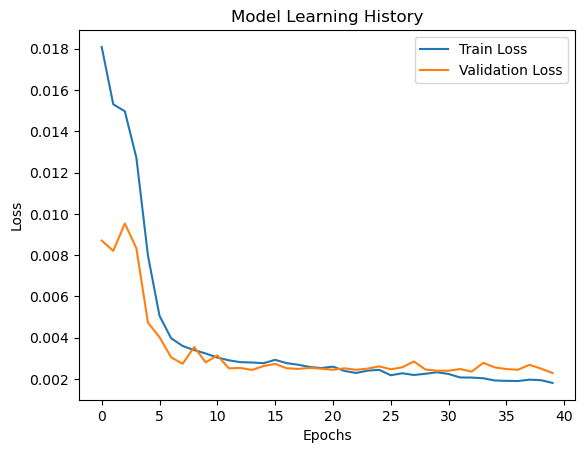

In [61]:
lstm_model = build_advanced_lstm_model(input_shape)
train_and_plot_adv_model(lstm_model, X_train, y_train, epochs=40)

In [62]:
y_test_pred_final = lstm_model.predict(X_test)


41/41 [==============================] - 3s 10ms/step


In [63]:
y_test_pred_final = pm10_scaler.inverse_transform(y_test_pred_final)

lstm_mae_final, lstm_mse_final, lstm_evs_final = calculate_metrics(y_test_true, y_test_pred_final)

In [64]:
def plot_metric_final_comparison(adv_metrics, metric_name):
    models = ['RNN', 'GRU', 'LSTM', 'LSTM Final']

    bar_width = 0.35

    index = np.arange(len(models))
    index_normal = index - bar_width/2
    index_adv = index + bar_width/2

    plt.figure(figsize=(10, 6))
    #plt.bar(index_normal, normal_metrics, width=bar_width, label='Normal', alpha=0.7)
    plt.bar(index_adv, adv_metrics, width=bar_width, label='Advanced', alpha=0.7)

    plt.xlabel('Models')
    plt.ylabel(f'{metric_name} Comparison')
    plt.title(f'{metric_name} Comparison - Normal vs Advanced Models')
    plt.xticks(index, models)
    plt.legend()

    plt.show()

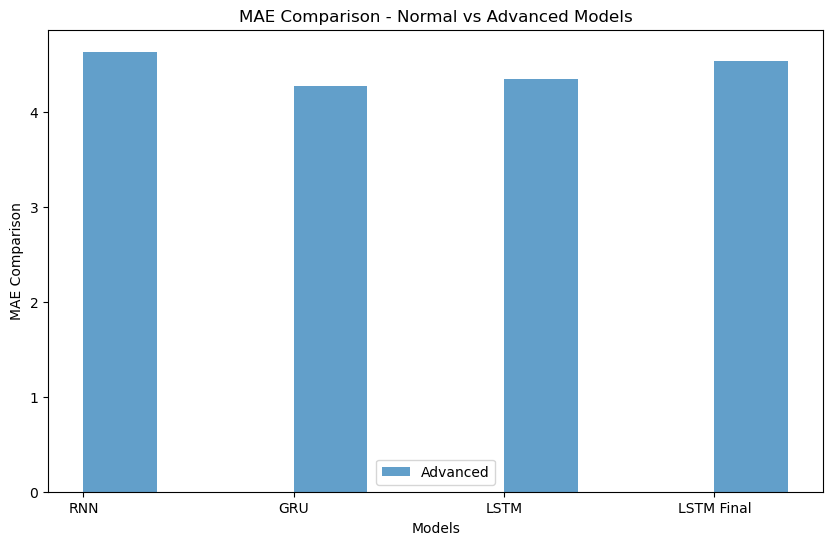

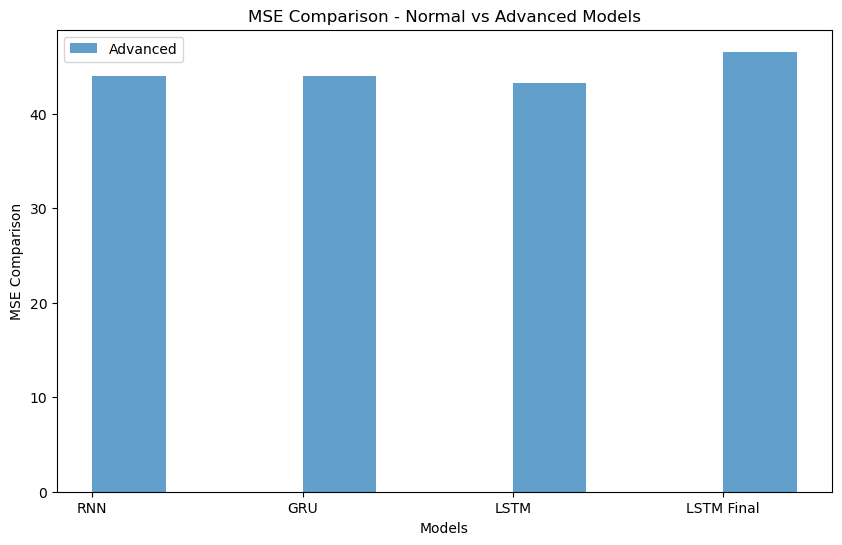

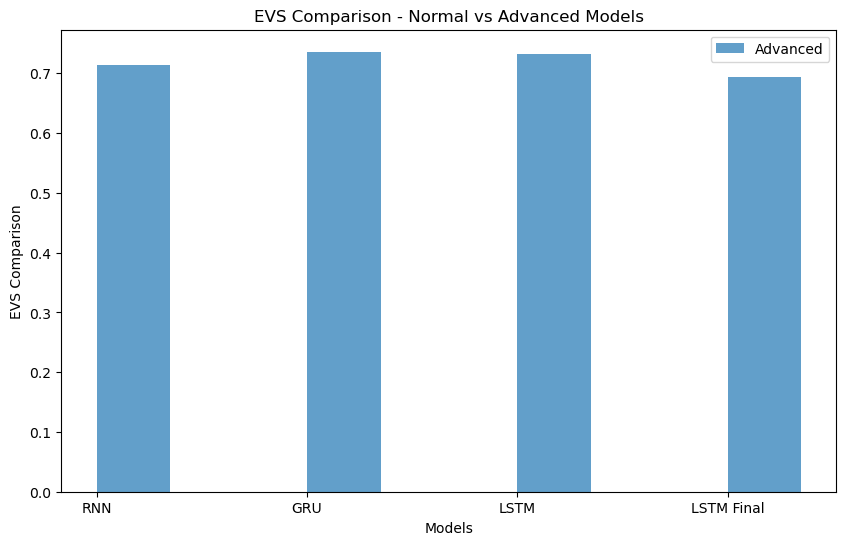

In [65]:
plot_metric_final_comparison( [rnn_mae_adv, gru_mae_adv, lstm_mae_adv, lstm_mae_final], 'MAE')

plot_metric_final_comparison( [rnn_mse_adv, gru_mse_adv, lstm_mse_adv, lstm_mse_final], 'MSE')

plot_metric_final_comparison( [rnn_evs_adv, gru_evs_adv, lstm_evs_adv, lstm_evs_final], 'EVS')